## Part 1. Review the online programming.

In [1]:
from collections import defaultdict

original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]

In [2]:
price = defaultdict(int)

In [3]:
for i,p in enumerate(original_price):
    price[i+1] = p 

In [4]:
price[1]

1

In [5]:
price[1111]

0

In [6]:
called_time_with_arg = defaultdict(int)

In [7]:
def get_call_times(f):
    result = f()
    print("function:{} called once!".format(f.__name__))
    called_time[f.__name__] += 1
    
    return result

In [8]:
def r(n):
    fname = r.__name__
    called_time_with_arg[fname,n] += 1
    return max(
        [price[n]] + [r(i) + r(n-i) for i in range(1,n)]
    )

In [9]:
r(15)

43

In [10]:
from collections import Counter

In [11]:
Counter(called_time_with_arg).most_common()

[(('r', 1), 3188646),
 (('r', 2), 1062882),
 (('r', 3), 354294),
 (('r', 4), 118098),
 (('r', 5), 39366),
 (('r', 6), 13122),
 (('r', 7), 4374),
 (('r', 8), 1458),
 (('r', 9), 486),
 (('r', 10), 162),
 (('r', 11), 54),
 (('r', 12), 18),
 (('r', 13), 6),
 (('r', 14), 2),
 (('r', 15), 1)]

In [12]:
call_time_with_arg = defaultdict(int)
def get_call_time(f):
    
    "f is a function"
    def wrap(n):
        #print("I can count!")
        result = f(n)
        call_time_with_arg[f.__name__,n] += 1
        return result
    return wrap

In [13]:
@get_call_time
def add_ten(n):
    return n + 10

In [14]:
add_ten = get_call_time(add_ten) 

In [15]:
add_ten(10)

20

In [16]:
call_time_with_arg

defaultdict(int, {('add_ten', 10): 1, ('wrap', 10): 1})

In [17]:
@get_call_time
def r(n):
    return max(
        [price[n]] + [r(i) + r(n-i) for i in range(1,n)]
    )

In [18]:
r(12)

35

In [19]:
call_time_with_arg

defaultdict(int,
            {('add_ten', 10): 1,
             ('wrap', 10): 1,
             ('r', 1): 118098,
             ('r', 2): 39366,
             ('r', 3): 13122,
             ('r', 4): 4374,
             ('r', 5): 1458,
             ('r', 6): 486,
             ('r', 7): 162,
             ('r', 8): 54,
             ('r', 9): 18,
             ('r', 10): 6,
             ('r', 11): 2,
             ('r', 12): 1})

In [20]:
from functools import wraps

In [21]:
def memo(f):
    already_computed = {}
    
    @wraps(f)
    def _wrap(arg):
        result = None
        
        if arg in already_computed:
            result = already_computed[arg]
        else :
            result = f(arg)
            already_computed[arg] = result
        return result
    return _wrap

In [22]:
solution ={}

In [23]:
@memo
@get_call_time
def r(n):
    max_price,max_split = max(
        [(price[n],0)] + [(r(i) + r(n-i),i) for i in range(1,n)],key = lambda x:x[0]
    )
    solution[n]=(n-max_split,max_split)
    return max_price

In [24]:
r(44)

130

In [25]:
call_time_with_arg

defaultdict(int,
            {('add_ten', 10): 1,
             ('wrap', 10): 1,
             ('r', 1): 118099,
             ('r', 2): 39367,
             ('r', 3): 13123,
             ('r', 4): 4375,
             ('r', 5): 1459,
             ('r', 6): 487,
             ('r', 7): 163,
             ('r', 8): 55,
             ('r', 9): 19,
             ('r', 10): 7,
             ('r', 11): 3,
             ('r', 12): 2,
             ('r', 13): 1,
             ('r', 14): 1,
             ('r', 15): 1,
             ('r', 16): 1,
             ('r', 17): 1,
             ('r', 18): 1,
             ('r', 19): 1,
             ('r', 20): 1,
             ('r', 21): 1,
             ('r', 22): 1,
             ('r', 23): 1,
             ('r', 24): 1,
             ('r', 25): 1,
             ('r', 26): 1,
             ('r', 27): 1,
             ('r', 28): 1,
             ('r', 29): 1,
             ('r', 30): 1,
             ('r', 31): 1,
             ('r', 32): 1,
             ('r', 33): 1,
             

In [26]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (10, 1),
 12: (10, 2),
 13: (10, 3),
 14: (12, 2),
 15: (13, 2),
 16: (10, 6),
 17: (16, 1),
 18: (16, 2),
 19: (16, 3),
 20: (10, 10),
 21: (20, 1),
 22: (20, 2),
 23: (20, 3),
 24: (22, 2),
 25: (23, 2),
 26: (20, 6),
 27: (26, 1),
 28: (26, 2),
 29: (26, 3),
 30: (20, 10),
 31: (30, 1),
 32: (30, 2),
 33: (30, 3),
 34: (32, 2),
 35: (33, 2),
 36: (30, 6),
 37: (36, 1),
 38: (36, 2),
 39: (36, 3),
 40: (30, 10),
 41: (40, 1),
 42: (40, 2),
 43: (40, 3),
 44: (42, 2)}

In [27]:
def parse_solution(n):
    left_split,right_split = solution[n]
    
    if right_split == 0:
        return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split) 

In [28]:
parse_solution(10)

[10]

In [29]:
parse_solution(34)

[10, 10, 10, 2, 2]

## Part 2 change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [30]:
%matplotlib inline

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_boston

In [32]:
data = load_boston()
X, y = data['data'], data['target']

In [33]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

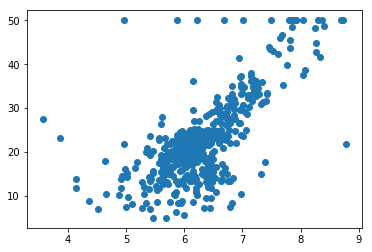

In [34]:
draw_rm_and_price()

In [35]:
def price(rm, k, b):
    return k * rm + b

In [36]:
def abs_loss(y,y_hat):
    return sum(abs(y_i-y_hat_i) for y_i,y_hat_i in zip(list(y),list(y_hat))) / len(y)
    

In [37]:
abs_loss([1,1,1,1],[-1,-1,1,1])

1.0

In [38]:
def abs_partial_k(x,y,k,b):
    gradient = 0
   
    for x_i,y_i in zip(list(x),list(y)):
        
        if y_i-k*x_i-b > 0 :
            gradient += -1*x_i
        if y_i-k*x_i-b <= 0 :
            gradient += x_i
    return gradient

In [39]:
def abs_partial_b(x,y,k,b):
    gradient = 0
   
    for x_i,y_i in zip(list(x),list(y)):
        
        if y_i-k*x_i-b > 0 :
            gradient += -1
        if y_i-k*x_i-b <= 0 :
            gradient += 1
    return gradient

In [40]:
X_rm = X[:, 5]
trying_time = 5000
min_loss = float("inf")

k_direction ,b_direction = 0,0

current_k = random.random()*200 - 100
    
current_b = random.random()*200 - 100

learning_rate = 0.0001

for i in range (trying_time):
    
    price_by_k_and_b = [price(r,current_k,current_b) for r in X_rm]
    
    
    current_loss = abs_loss(y,price_by_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        if i % 500 == 0:
          print("when time is :{},get best_k is {},best_b is {},and the loss is {}".format(i,current_k,current_b,min_loss))   
    
    k_gradient = abs_partial_k(X_rm,y,current_k,current_b)
    
    b_gradient = abs_partial_b(X_rm,y,current_k,current_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate
    
    current_b = current_b + (-1 * b_gradient) * learning_rate

when time is :0,get best_k is -47.22539984914982,best_b is 60.750732324440804,and the loss is 258.5764458480743
when time is :500,get best_k is -7.219588849149912,best_b is 65.79353232444107,and the loss is 9.423043638832063
when time is :1000,get best_k is -6.952109249149854,best_b is 64.09973232444088,and the loss is 9.30681859339148
when time is :1500,get best_k is -6.681253249149814,best_b is 62.40873232444125,and the loss is 9.190895023193875
when time is :2000,get best_k is -6.405283249149778,best_b is 60.71873232444164,and the loss is 9.07499523831248
when time is :2500,get best_k is -6.1293132491497415,best_b is 59.028732324442025,and the loss is 8.95909545343107
when time is :3000,get best_k is -5.853343249149705,best_b is 57.33873232444241,and the loss is 8.843195668549676
when time is :3500,get best_k is -5.577794449149672,best_b is 55.6487323244428,and the loss is 8.727300541112927
when time is :4000,get best_k is -5.323557249149666,best_b is 53.96433232444317,and the loss 

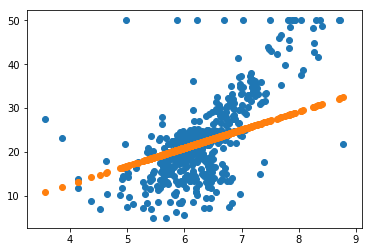

In [41]:
k =  4.140744161541482
b = -3.88318737359951
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## Part 3.Finish the Solution Parse Part of Edit-Distance

In [1]:
from functools import lru_cache

In [125]:
solution = {}
operation = None

@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0:
        solution[(string1, string2)] = ("",""),'ADD {}'.format(string2) 
        return len(string2)
    if len(string2) == 0:
        solution[(string1, string2)] =("",""),'DEL {}'.format(string1) 
        return len(string1)
    
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1,(string1[:-1], string2) ,'DEL {}'.format(tail_s1)),  # 删除1的最后一个字母
        (edit_distance(string1, string2[:-1]) + 1,(string1, string2[:-1]), 'ADD {}'.format(tail_s2)),  # 在1的后面增加2的最后一个字母
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0,(string1[:-1], string2[:-1]), '')
    else :
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, (string1[:-1], string2[:-1]),'SUB {} => {}'.format(tail_s1, tail_s2)) #把1的最后一个字母替换成2的
    
    candidates.append(both_forward)
    
    min_distance,(begin,endness),operation = min(candidates, key=lambda x: x[0])

    
    solution[(string1, string2)] = (begin,endness),operation 


    return min_distance 

In [126]:
edit_distance("AABB","HAAI")

3

In [127]:
solution["AABB","HAAI"]

(('AAB', 'HAAI'), 'DEL B')

In [128]:
solution["AAB","HAAI"]

(('AA', 'HAA'), 'SUB B => I')

In [129]:
solution["AA","HAA"]

(('A', 'HA'), '')

In [130]:
solution["A","HA"]

(('', 'H'), '')

In [131]:
solution["","H"]

(('', ''), 'ADD H')

In [154]:
pathes = []
def parse_solutions(string1,string2):
    x = edit_distance(string1, string2) #运行一遍edit_distance
    (begin,endness) = (string1,string2)
    
    while (begin,endness) != ("",""):
        (begin,endness),operation = solution[(begin,endness)] #找出每次的operation前一步的2个字符串是什么，用solution回溯
        if operation != "":
            pathes.append(operation) #将每次的操作记录下来，如果不用操作，即末尾字母相同时，不用加入
    
    return pathes


In [155]:
parse_solutions("susu","whw")

['DEL u', 'SUB s => w', 'SUB u => h', 'SUB s => w']

## Part 5-1: review machine learning

Why do we use Derivative / Gredient to fit a target function?
Ans:因为梯度下降的话，每一次的改变都是基于导数的性质，因此每次下降的改变量都基于当前获得的值，它比第二种方法所人为确认的方向精确的 多，使误差下降的也更快。

In the words 'Gredient Descent', what's the Gredient and what's the Descent?
Ans:梯度在对于含有多个变量的实值函数中，指的是对于每个自变量的偏导，它表示的是关于每个自变量的变化率。下降是指的由于我们是要使算出来 的值（误差）更小，所以我们在每一次调整的时候尽可能的让自变量的变化率趋近于0。

What's the advantages of the 3rd gradient descent method compared to the previous methods?
Ans:因为每次下降的改变量都基于当前获得的值，它比第二种方法所人为确认的方向精确的多，使误差下降的也更快。

Using the simple words to describe: What's the machine leanring.
Ans:给定数据和学习方法，使得计算机可以自己去修正结果，并输出我们想要的内容。